In [61]:
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

import pandas as pd
import json
import ast
from pathlib import Path
import os


In [62]:
data_path = Path("..") / "data" / "bin_class_data_TOKENIZED_SET_V1.csv"
data = pd.read_csv(data_path)
data.head()

,mtype,tokens,type_tokens,label
0,FUNC,"['f', ':', 'A', '\\to', 'B']","['func_def', 'func_name', '__ANON_1', 'COLON',...",1
1,FUNC,['f'],"['func_name', '__ANON_1']",1
2,FUNC,"['g', '\\colon', 'B', '\\to', 'I']","['func_def', 'func_name', '__ANON_1', 'COLON',...",1
3,SCAL,"['\\frac', '{', '8', '!', '}', '{', '(', '8', ...","['expr_atom', 'CMD_FRAC', 'L_BRACE', 'postfix'...",1
4,FUNC,['f'],"['func_name', '__ANON_1']",1


In [63]:
### reformat strings to lists of strings
def preprocess_data(corpus,
                    irrelevant_features=["mtype",]):
    # drop irrelevant columns
    corpus.drop(irrelevant_features, inplace=True, axis=1)

    # filter strings
    def process_cell(cell_str):
        stripped_f_str = cell_str[1:-1].replace("\\\\", "\\")
        f_list = stripped_f_str.split(",")
        f_list = [token.replace("'", "").replace(" ", "") for token in f_list]
        f_list = ["{" if token == "\\{" else token for token in f_list]
        f_list = ["}" if token == "\\}" else token for token in f_list]
        return f_list

    
    corpus["type_tokens"] = corpus["type_tokens"].map(process_cell)
    corpus["type_tokens_len"] = corpus["type_tokens"].apply(lambda x: len(x))
    corpus["tokens"] = corpus["tokens"].map(process_cell)
    corpus["tokens_len"] = corpus["tokens"].apply(lambda x: len(x))

In [64]:
preprocess_data(data) 
data.head()

,tokens,type_tokens,label,tokens_len
0,"[f, :, A, \to, B]","[func_def, func_name, __ANON_1, COLON, mapping...",1,5
1,[f],"[func_name, __ANON_1]",1,1
2,"[g, \colon, B, \to, I]","[func_def, func_name, __ANON_1, COLON, mapping...",1,5
3,"[\frac, {, 8, !, }, {, (, 8, -, 4, ), !, }]","[expr_atom, CMD_FRAC, L_BRACE, postfix, expr_a...",1,13
4,[f],"[func_name, __ANON_1]",1,1


In [65]:
### create statistics
def plot_classes(data):
    print(f"Data types:\n{data.dtypes}\n")
    print(f"There are {len(data['label'].unique())} comment types: {data['label'].unique()}")

    data.groupby("label").label.count().plot.bar(ylim=0)
    plt.xticks([0,1],['NOT elementary-set-theory', 'elementary-set-theory'], rotation=0)
    plt.xlabel("category")
    plt.ylabel("number of formulas")
    #plt.yscale("log")
    #plt.yticks(ticks=[0, 7000])
    #plt.title("Dataset distribution", pad=20)
    plt.show()


def plot_input_lengths(df):
    
    counts = df['tokens_len'].value_counts()

    # Create bar chart
    fig, ax = plt.subplots()
    ax.bar(counts.index, counts.values, color="green")
    ax.set_yscale("log")
    ax.set_xlabel('Tokens list lengths')
    ax.set_ylabel('Frequency')
    #ax.set_title("Distribution of Tokens Lengths")
    plt.show()



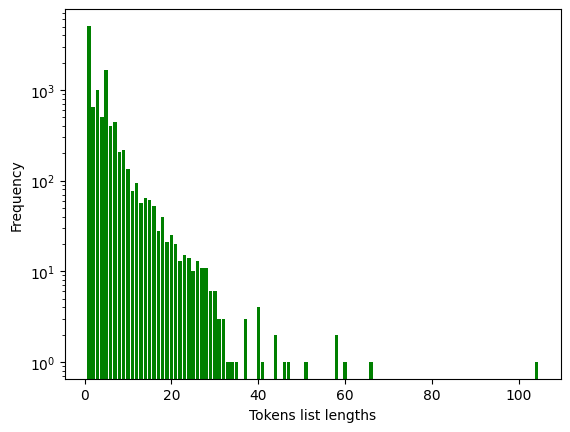

In [66]:
plot_input_lengths(data)

Data types:
tokens         object
type_tokens    object
label           int64
tokens_len      int64
dtype: object

There are 2 comment types: [1 0]


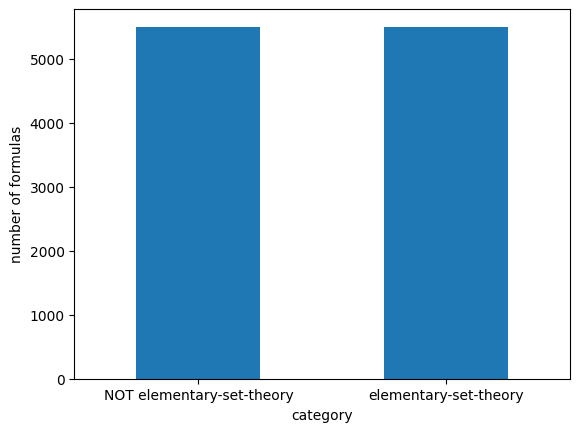

In [67]:
plot_classes(data)